# Sales Data Analysis Project

## Introduction

This project aims to perform an in-depth analysis of sales data to uncover key insights and trends. The analysis covers various aspects such as sales performance over time, regional sales distribution, customer segmentation, shipping efficiency, and product portfolio analysis. By leveraging data visualization techniques, we aim to provide a comprehensive understanding of the sales dynamics and identify areas for potential improvement.

## Objectives

1. **Sales Performance Analysis**: Analyze sales trends over time, identify peak sales periods, and calculate the sales growth rate.
2. **Regional Analysis**: Examine sales distribution across different regions, identify top-performing states and cities, and visualize geographical sales patterns.
3. **Customer Segmentation Analysis**: Segment customers based on their purchasing behavior, analyze sales by customer segment, and evaluate customer purchase frequency and average order value.
4. **Shipping Analysis**: Assess order processing times, shipping mode preferences, and shipping efficiency by region. Analyze the impact of shipping modes on sales.
5. **Product Portfolio Analysis**: Evaluate sales performance by product category and sub-category, identify top-selling products, and analyze product diversity across customer segments.

## Data Overview

The dataset used in this analysis includes various attributes such as order date, ship date, customer information, product details, sales figures, and more. The key variables present in the dataset are:

- **avg_order_value**: Average order value by customer segment.
- **category_region_sales**: Sales performance by category and region.
- **category_sales**: Sales data by category, sub-category, and product name.
- **city_sales**: Sales data by city.
- **customer_region_distribution**: Distribution of customers across regions.
- **customer_segments**: Customer segmentation data.
- **daily_sales**: Daily sales figures.
- **df**: The main dataframe containing all sales data.
- **fig**: Plotly figure object for visualizations.
- **monthly_sales**: Monthly sales figures.
- **product_diversity**: Number of unique products purchased by each customer segment.
- **purchase_frequency**: Frequency of purchases by each customer.
- **region_sales**: Sales data by region.
- **region_sales_percentage**: Percentage of total sales by region.
- **rolling_sales**: Rolling sum of sales to identify peak periods.
- **sales_by_segment**: Total sales by customer segment.
- **sales_growth**: Sales growth rate over time.
- **ship_mode_by_segment**: Distribution of shipping modes by customer segment.
- **ship_mode_counts**: Count of each shipping mode.
- **shipping_efficiency_region**: Average processing time by region.
- **state_sales**: Sales data by state.
- **top_selling_products**: Top-selling products based on total sales.

## Methodology

The analysis is structured into several sections, each focusing on a specific aspect of the sales data. Various data visualization techniques such as line plots, bar charts, pie charts, heat maps, treemaps, and sunburst charts are used to present the findings in an intuitive and insightful manner.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# 1. Sales Performance Analysis


1.1 Time Series Analysis of Sales Trends (using Order Date)



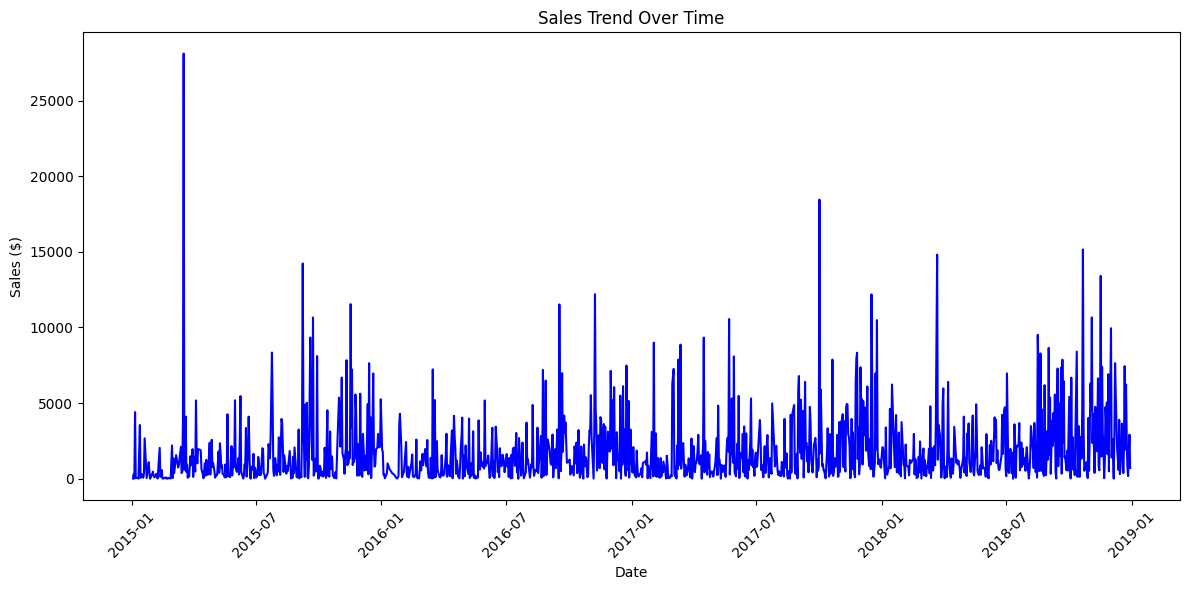

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

daily_sales = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The graph visualizes the daily total sales over time, providing insights into the overall sales performance. Here are some key observations:

**Overall Sales Growth:** Despite some fluctuations, the sales trend generally shows an upward trajectory throughout the period, indicating business growth.

**High Sales Variability:** There are significant spikes and dips in the daily sales, suggesting sales are not consistent day-to-day. This variability could be due to promotions, seasonal demand, or specific customer orders.

**Potential Anomalies:** A few extremely high sales peaks are visible (e.g., one in early 2015), potentially indicating large bulk orders, special corporate purchases, or data entry errors. Further investigation is recommended to understand these outliers.

**Seasonal Trends:** Though not definitive, some recurring patterns might suggest a seasonal influence on sales. Analyzing monthly or quarterly aggregates could provide more clarity on this aspect.

**Sales Volatility:** The daily sales line is quite erratic, signifying substantial day-to-day fluctuations in demand. This volatility emphasizes the importance of considering contributing factors when forecasting future sales.


**Important Considerations:**

* This graph offers a high-level view of sales performance. More in-depth time series analysis is needed for comprehensive insights.
* External factors (marketing campaigns, product launches, economic conditions) should be considered for a thorough explanation of the trends.
* Further investigation using techniques like moving averages or seasonal decomposition would be beneficial for detailed analysis.





1.2 Monthly/Quarterly/Yearly Revenue Patterns




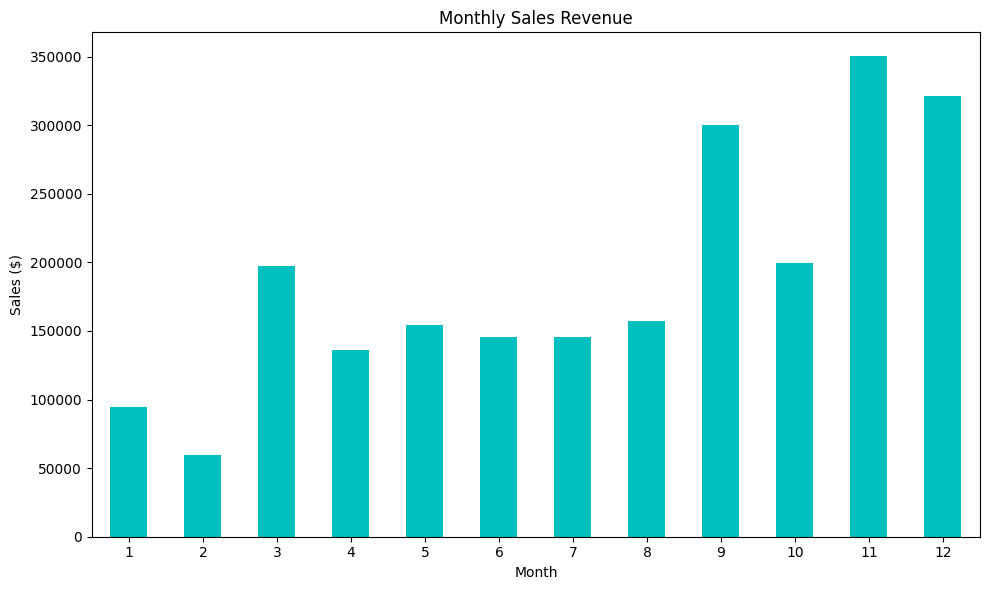

In [28]:
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.to_period('Q')
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='c')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Monthly Sales Revenue Insights

* **November is the Peak Sales Month:** Shows the highest revenue, indicating a potential holiday season impact.
* **Sales Decline in December:**  Despite the holiday season, sales drop significantly, suggesting potential post-holiday slowdown.
* **Lowest Sales in February and January:** Indicate a potential slow period for business.
* **Steady Increase from March to November:** Reflects a gradual rise in sales activity leading up to the peak season.
* **Moderate Fluctuations in Mid-Year:**  Sales show some variability in the months between March and October.

1.3 Sales Growth Rate Over Time

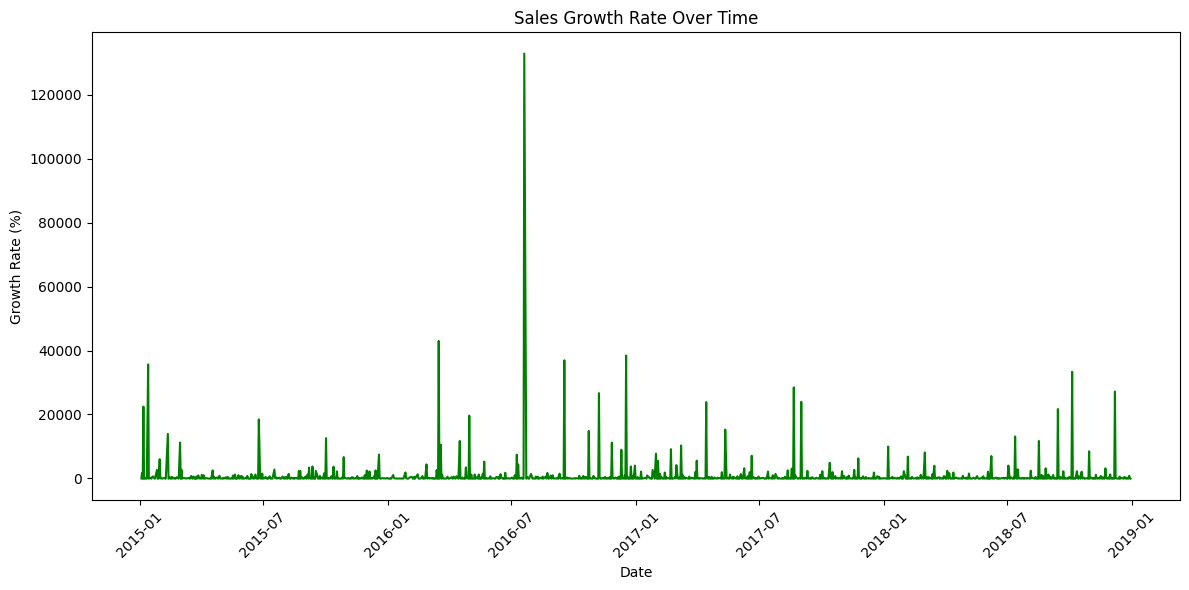

In [29]:
sales_growth = daily_sales.pct_change().fillna(0) * 100

plt.figure(figsize=(12,6))
plt.plot(sales_growth.index, sales_growth.values, color='g')
plt.title('Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*   Steep Growth: The sales growth rate exhibits a sharp surge around mid-2016.
* Fluctuating Sales Growth Rate: The sales growth rate experiences a brief surge before stabilizing at a consistently low level.



















1.4 Peak Sales Periods Identification

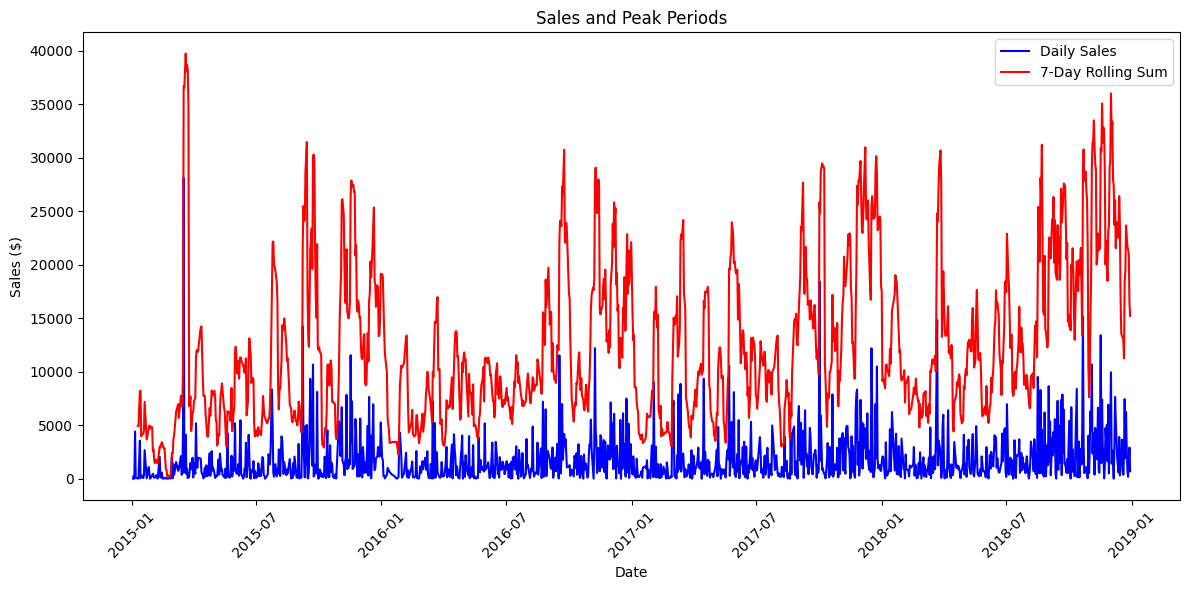

In [30]:
rolling_sales = daily_sales.rolling(window=7).sum()

plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, color='b', label='Daily Sales')
plt.plot(rolling_sales.index, rolling_sales.values, color='r', label='7-Day Rolling Sum')
plt.title('Sales and Peak Periods')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*   Sales Volatility: The daily sales (blue line) show frequent fluctuations, indicating varying demand across different periods.
*   Periodic Sales Spikes: Several sharp peaks suggest periods of high sales activity, possibly influenced by promotions, seasonal demand, or bulk purchases.
*  Long-Term Growth Pattern: The 7-day rolling sum (red line) reveals an overall upward trend, indicating increasing sales volume over time, especially after mid-2016.
* Recurring Demand Surges: Repeated spikes in the rolling sum suggest seasonal trends or cyclical customer purchasing behavior.



#2. Regional Analysis

2.1 Sales Distribution Across Regions

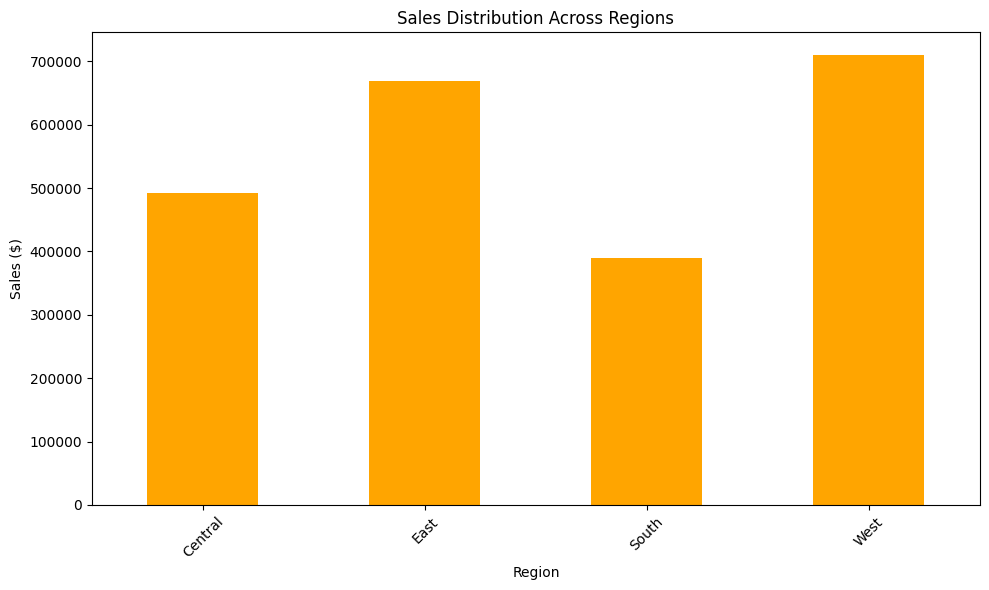

In [31]:

region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(10,6))
region_sales.plot(kind='bar', color='orange')
plt.title('Sales Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*   Regional Sales Comparison:

    * The East and West regions exhibit comparable sales performance, indicating similar market dynamics.
    * Similarly, the South and Central regions show matching sales trends, suggesting aligned customer behavior and demand patterns.





2.2 Top Performing States/Cities

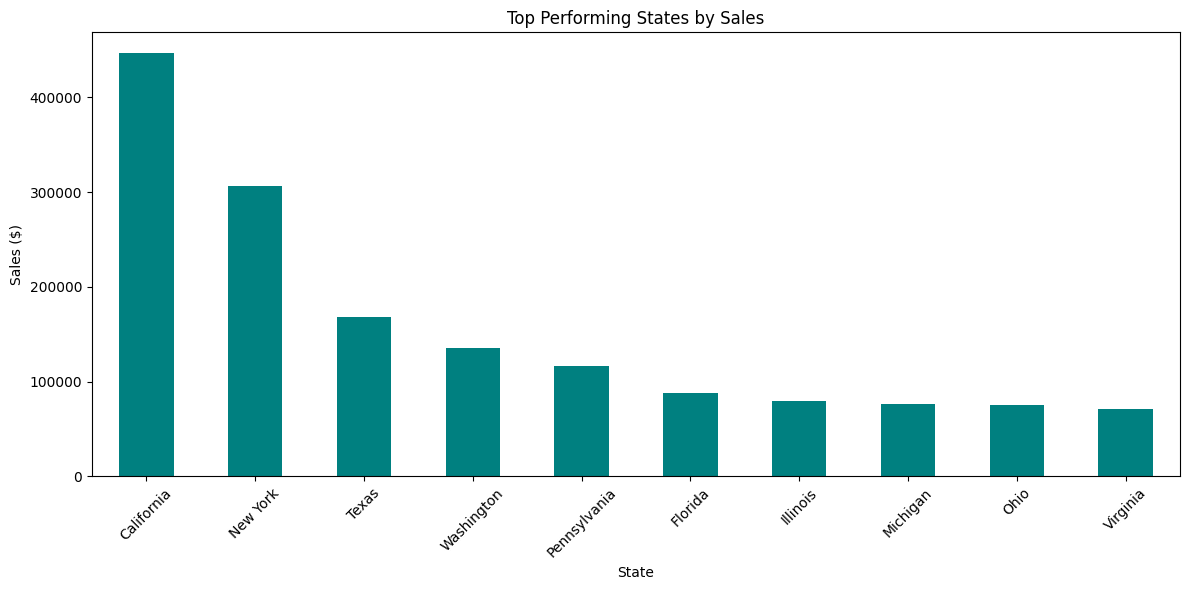

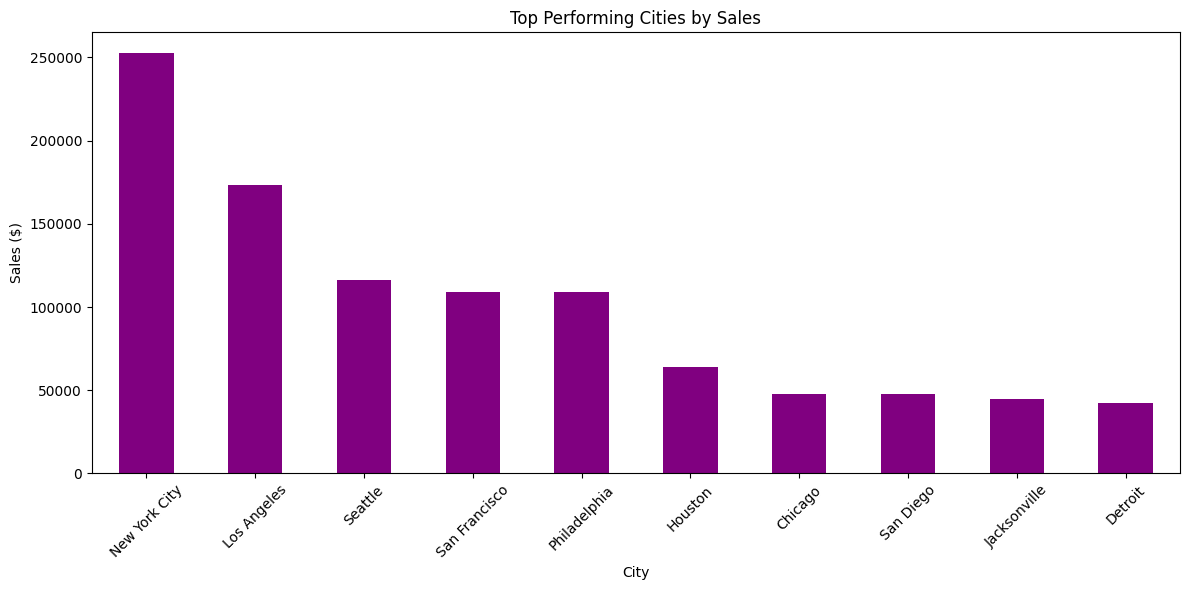

In [32]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_sales.head(10).plot(kind='bar', color='teal')
plt.title('Top Performing States by Sales')
plt.xlabel('State')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
city_sales.head(10).plot(kind='bar', color='purple')
plt.title('Top Performing Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Unequal Sales:Major cities like New York and Los Angeles exhibit significantly high sales, while other cities maintain relatively low and stable sales.

2.3 Geographical Heat Maps of Sales

In [33]:
import folium
from folium.plugins import HeatMap

# Sample coordinates for cities (replace with actual city coordinates)
city_coords = {
    'New York': [40.7128, -74.0060],
    'Los Angeles': [34.0522, -118.2437],
    'Chicago': [41.8781, -87.6298],
    'Houston': [29.7604, -95.3698],
    'Phoenix': [33.4484, -112.0740],
    'Philadelphia': [39.9526, -75.1652],
    'San Antonio': [29.4241, -98.4936],
    'San Diego': [32.7157, -117.1611],
    'Dallas': [32.7767, -96.7970],
    'San Jose': [37.3382, -121.8863],
    'Austin': [30.2672, -97.7431],
    'Jacksonville': [30.3322, -81.6557],
    'Fort Worth': [32.7555, -97.3308],
    'Columbus': [39.9612, -82.9988],
    'Charlotte': [35.2271, -80.8431]
}

# Assuming 'city_sales' is the series containing sales data for cities
# Merge city sales with coordinates
city_sales_coords = city_sales.head(15).reset_index()  # Adjust to get your top cities
city_sales_coords['Coordinates'] = city_sales_coords['City'].map(city_coords)

# Remove any rows with missing coordinates
city_sales_coords = city_sales_coords.dropna(subset=['Coordinates'])

# Create a Folium map centered at a general location
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Prepare heat map data
heat_data = [[coords[0], coords[1], sales]
             for coords, sales in zip(city_sales_coords['Coordinates'], city_sales_coords['Sales'])]

# Add the heat map to the Folium map
HeatMap(heat_data).add_to(m)

# Display the map
m


2.4 Regional Market Penetration

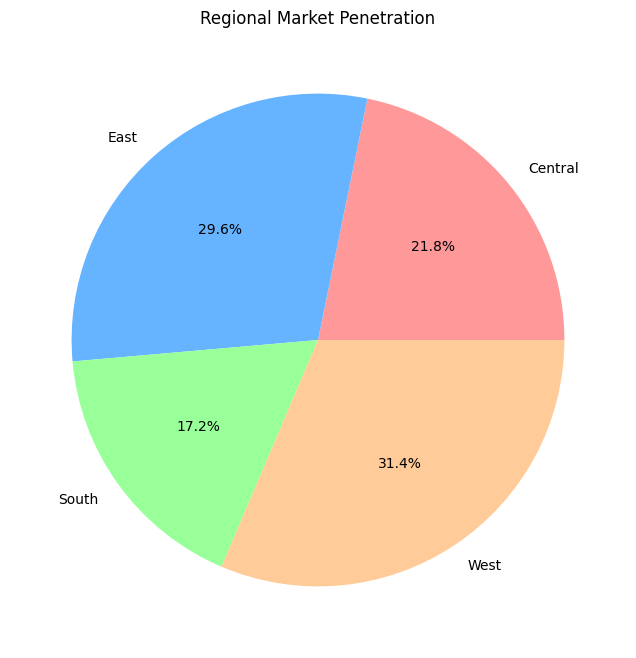

In [34]:
# Pie chart of regional market penetration
plt.figure(figsize=(8,8))
region_sales_percentage = region_sales / region_sales.sum() * 100
region_sales_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title('Regional Market Penetration')
plt.ylabel('')
plt.show()


* Regional Sales Contribution: The East and West regions account for more than 60% of total sales.

# 3 Customer Segmentation Analysis

3.1 Sales by Customer Segment

<ipython-input-35-33052f8a1170>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_segment, x='Segment', y='Sales', palette='viridis')


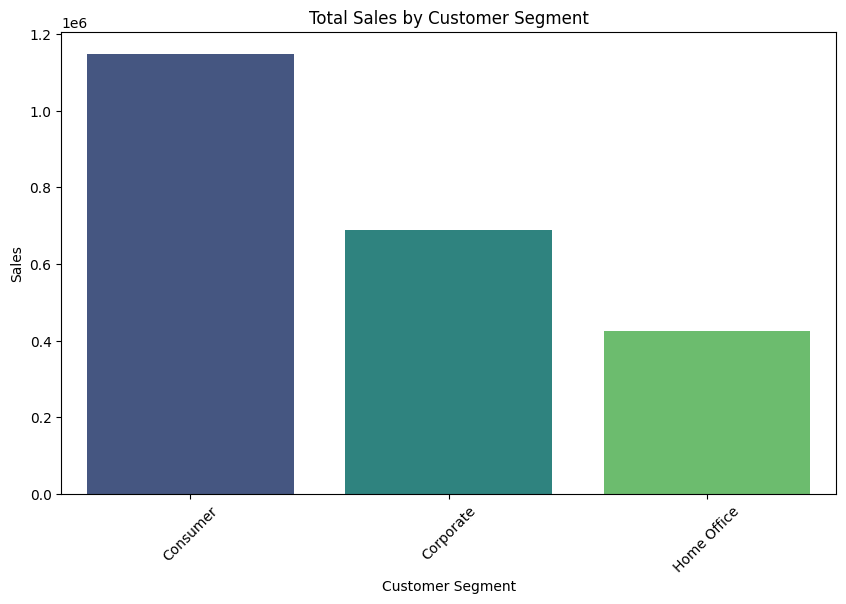

In [35]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

# Plotting Sales by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_segment, x='Segment', y='Sales', palette='viridis')
plt.title('Total Sales by Customer Segment')
plt.ylabel('Sales')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.show()

* Sales by Customer Segment: The Consumer segment has the highest sales, followed by the Corporate segment, with Home Office having the lowest sales.

In [36]:
# Customer Purchase Frequency
purchase_frequency = df.groupby('Customer ID')['Order ID'].count().reset_index()
purchase_frequency.columns = ['Customer ID', 'Purchase Frequency']

In [37]:
# Merge purchase frequency with segment info
customer_segments = df[['Customer ID', 'Segment']].drop_duplicates()
purchase_frequency = purchase_frequency.merge(customer_segments, on='Customer ID')

3.2 Customer Purchase Frequency by Segment

<ipython-input-38-3f49221e2d77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_frequency, x='Segment', y='Purchase Frequency', palette='Set2')


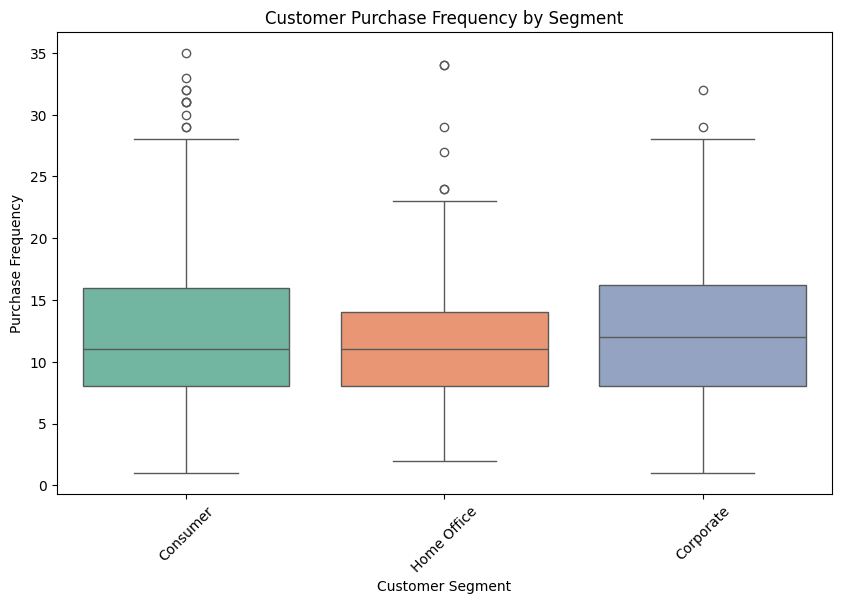

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=purchase_frequency, x='Segment', y='Purchase Frequency', palette='Set2')
plt.title('Customer Purchase Frequency by Segment')
plt.ylabel('Purchase Frequency')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.show()

3.3 Average Order Value by Segment

<ipython-input-39-65b443c026a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value.index, y=avg_order_value.values, palette='coolwarm')


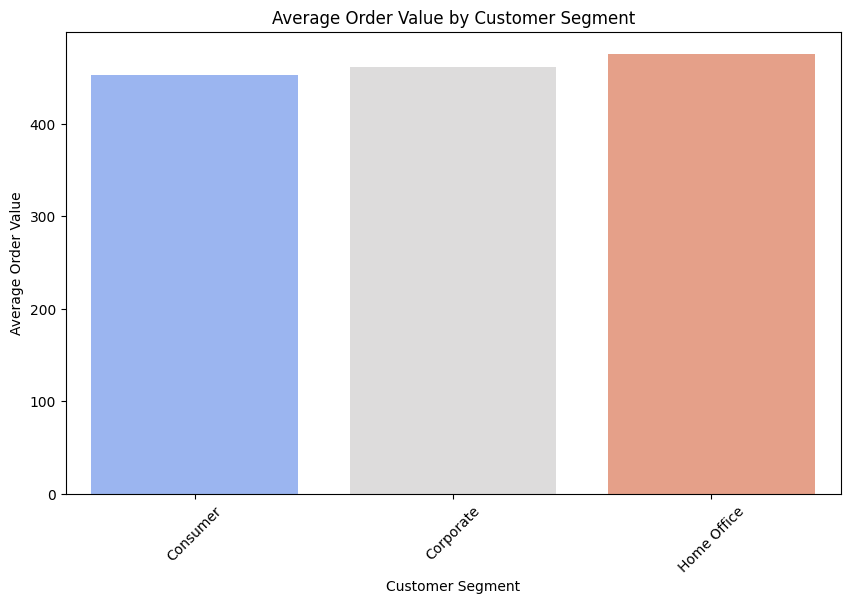

In [39]:
avg_order_value = df.groupby('Segment')['Sales'].sum() / df.groupby('Segment')['Order ID'].nunique()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_order_value.index, y=avg_order_value.values, palette='coolwarm')
plt.title('Average Order Value by Customer Segment')
plt.ylabel('Average Order Value')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.show()

3.4 Customer Distribution Across Regions

<ipython-input-40-793e0b79be83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_region_distribution, x='Region', y='Customer ID', palette='Blues')


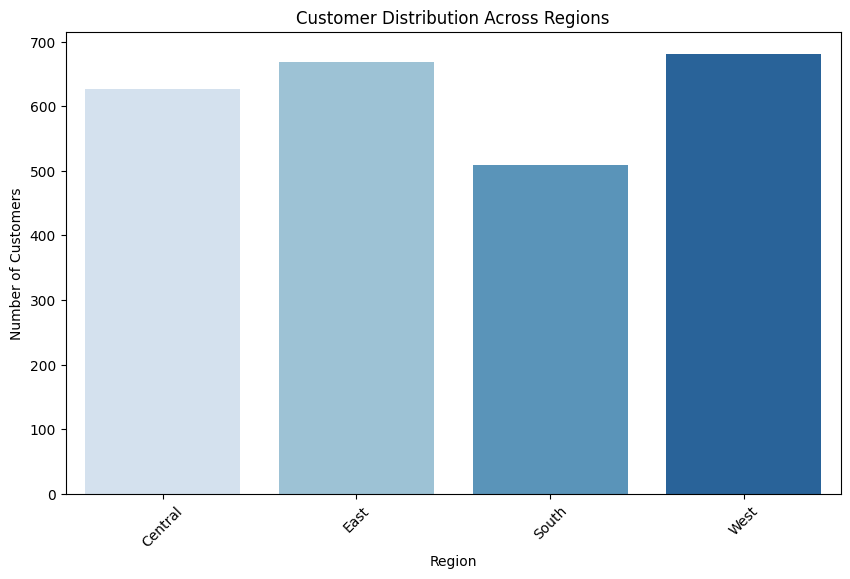

In [40]:
# Customer Distribution Across Regions
customer_region_distribution = df.groupby('Region')['Customer ID'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=customer_region_distribution, x='Region', y='Customer ID', palette='Blues')
plt.title('Customer Distribution Across Regions')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

# 4. Shipping Analysis

In [41]:
# Ensure the 'Order Date' and 'Ship Date' columns are in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Order Processing Time (difference between Order Date and Ship Date)
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

4.1 Order Processing Time

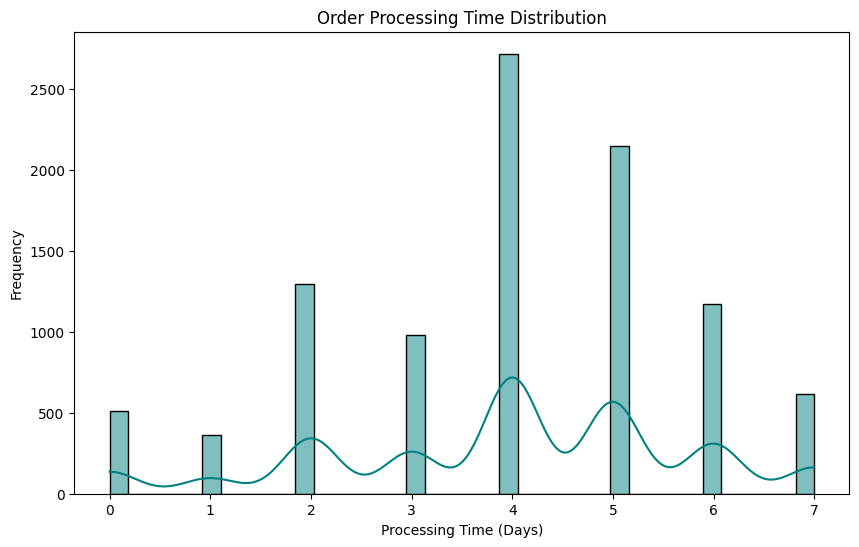

In [42]:
# Plotting Distribution of Order Processing Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Processing Time'], kde=True, color='teal')
plt.title('Order Processing Time Distribution')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()



*   Most Frequent Processing Time: The histogram's peak appears around 4-5 days, suggesting that most orders are processed and shipped within this timeframe.
*   General Distribution: The distribution is slightly right-skewed, meaning there's a longer tail on the right side. This indicates that while most orders are processed quickly, some orders take longer than the average.



4.2 Ship Mode Preference

<ipython-input-43-b2e482f2ed81>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_mode_counts, x='Ship Mode', y='Count', palette='Blues')


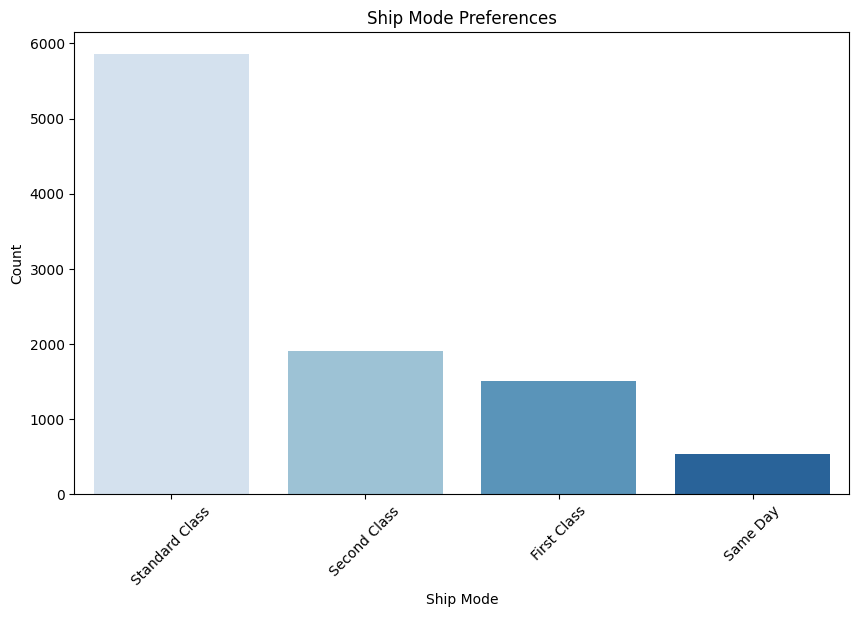

In [43]:
ship_mode_counts = df['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Count']

# Plotting Ship Mode Preferences
plt.figure(figsize=(10, 6))
sns.barplot(data=ship_mode_counts, x='Ship Mode', y='Count', palette='Blues')
plt.title('Ship Mode Preferences')
plt.ylabel('Count')
plt.xlabel('Ship Mode')
plt.xticks(rotation=45)
plt.show()



*  Standard Class Dominates: Standard Class Dominates: The "Standard Class" bar is significantly taller than the others, indicating it's the most preferred shipping mode. This suggests that a large portion of customers prioritize cost-effectiveness or perceive standard shipping as adequate for their needs.
* Second Class Holds a Moderate Share:   The "Second Class" bar has a decent height, implying a moderate level of preference. This option likely balances cost and speed for some customers.

*  First Class and Same Day Are Less Favored: The "First Class" and "Same Day" bars are considerably shorter, demonstrating lower usage compared to the other two options. This implies that customers opt for these faster, premium shipping modes less frequently, possibly due to higher costs or because they aren't crucial for most purchases.






4.3 Shipping Efficiency by Region

<ipython-input-44-c87ac72a6daa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_efficiency_region, x='Region', y='Processing Time', palette='viridis')


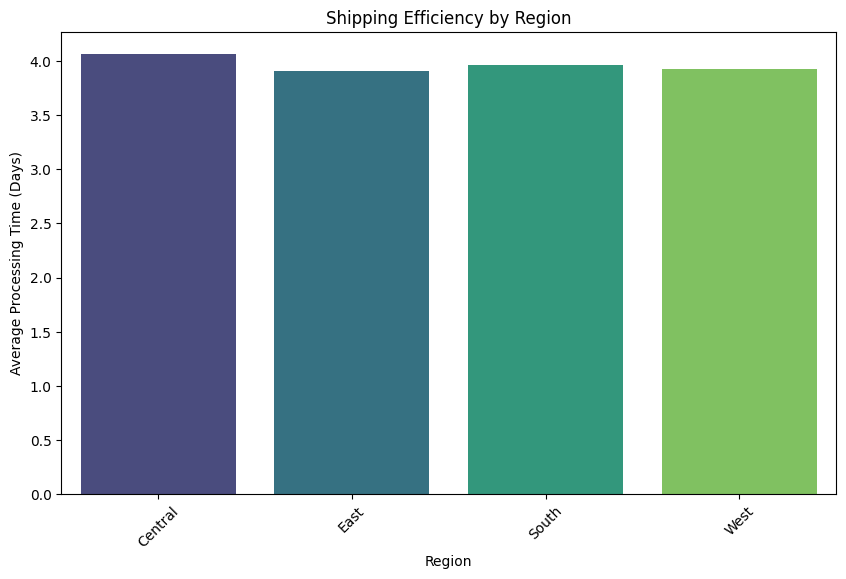

In [44]:
#Shipping Efficiency by Region (average processing time)
shipping_efficiency_region = df.groupby('Region')['Processing Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_efficiency_region, x='Region', y='Processing Time', palette='viridis')
plt.title('Shipping Efficiency by Region')
plt.ylabel('Average Processing Time (Days)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()



*   Average Processing Time: Average Processing Days is around 4 days for all regions.




4.4 Popular Shipping Modes by Segment

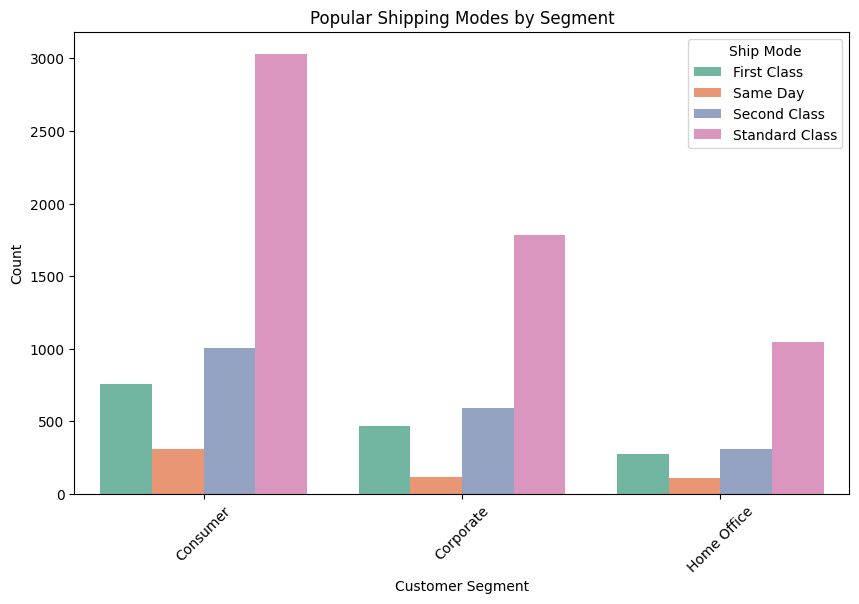

In [45]:
ship_mode_by_segment = df.groupby(['Segment', 'Ship Mode']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=ship_mode_by_segment, x='Segment', y='Count', hue='Ship Mode', palette='Set2')
plt.title('Popular Shipping Modes by Segment')
plt.ylabel('Count')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.show()

4.5 Impact of Shipping Mode on Sales

<ipython-input-46-d1cc8a8050ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ship Mode', y='Sales', palette='coolwarm')


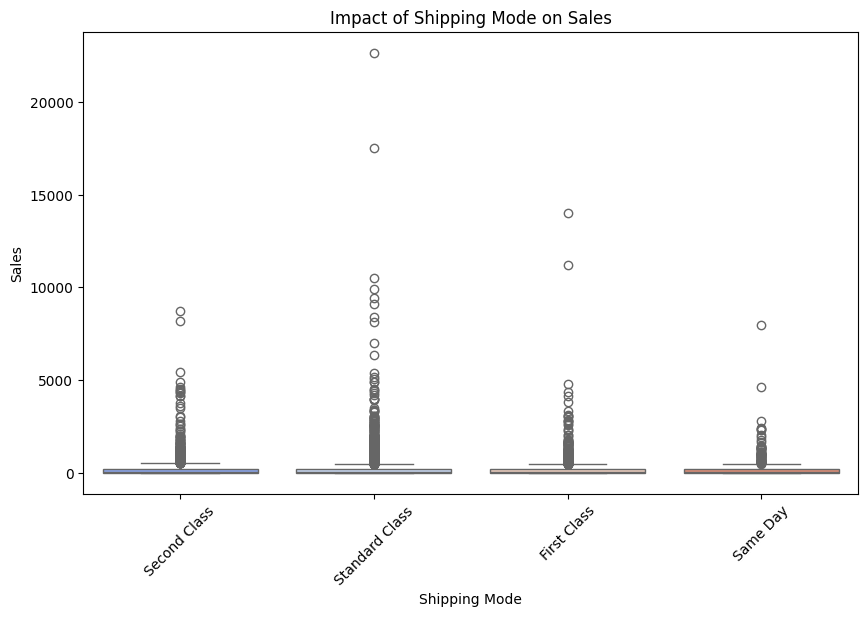

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ship Mode', y='Sales', palette='coolwarm')
plt.title('Impact of Shipping Mode on Sales')
plt.ylabel('Sales')
plt.xlabel('Shipping Mode')
plt.xticks(rotation=45)
plt.show()



*   Sales Distribution Across Shipping Modes: All four shipping modes—Standard Class, Second Class, First Class, and Same Day—exhibit similar sales distributions with a majority of sales concentrated at lower values.
Outliers are present in all categories, indicating occasional high-value sales.
*   Highest Sales Observations: Standard Class and First Class shipping have the highest instances of large sales, suggesting that customers making bulk or high-value purchases may prefer these shipping options.


*   Same Day Shipping Trends: Sales from Same Day shipping tend to be lower on average, indicating it might be used more for urgent, smaller purchases rather than bulk orders.





# 5. Product Portfolio Analysis

5.1 Sales by Category and Sub-Category

In [47]:
import plotly.express as px
# 1. Sales by Category and Sub-Category
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Plotting sales by category and sub-category (Treemap)
fig = px.treemap(category_sales,
                 path=['Category', 'Sub-Category'],
                 values='Sales',
                 title="Sales by Category and Sub-Category")
fig.show()



*   Technology Category: Phones contribute the most to sales, followed by machines and accessories. Copiers also have a significant share, though smaller compared to phones and machines.
*   Furniture Category:Chairs and tables dominate sales, indicating high demand in this segment. Bookcases and furnishings contribute relatively less to overall furniture sales.
*Office Supplies Category: Storage and binders account for the largest portion of sales in this category. Other sub-categories like appliances, paper, and supplies have moderate sales, while art, labels, and envelopes contribute the least.



5.2 Top Selling Products

<ipython-input-48-17b245014ecc>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




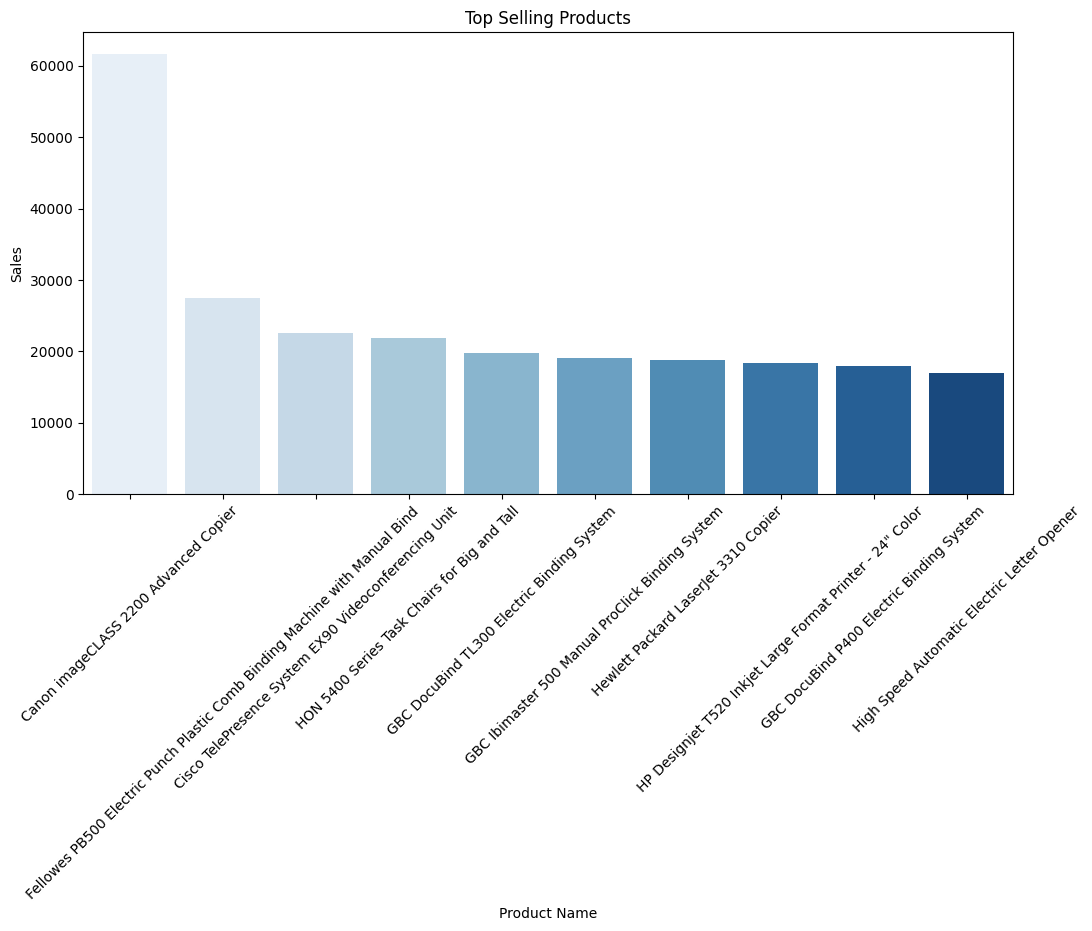

In [48]:
# 2. Top Selling Products
top_selling_products = df.groupby('Product Name')['Sales'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Sales', ascending=False).head(10)

# Plotting top-selling products (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_selling_products, x='Product Name', y='Sales', palette='Blues')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

5.3 Category Performance by Region

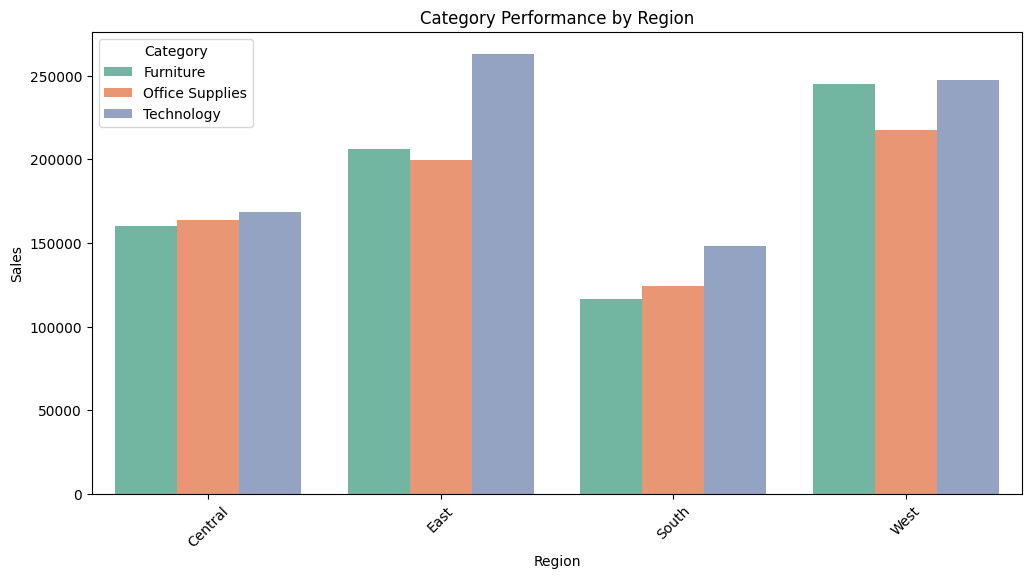

In [49]:
# 3. Category Performance by Region
category_region_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Plotting category performance by region (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=category_region_sales, x='Region', y='Sales', hue='Category', palette='Set2')
plt.title('Category Performance by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

5.4 Product Diversity Across Segments

<ipython-input-50-713faa372ed8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




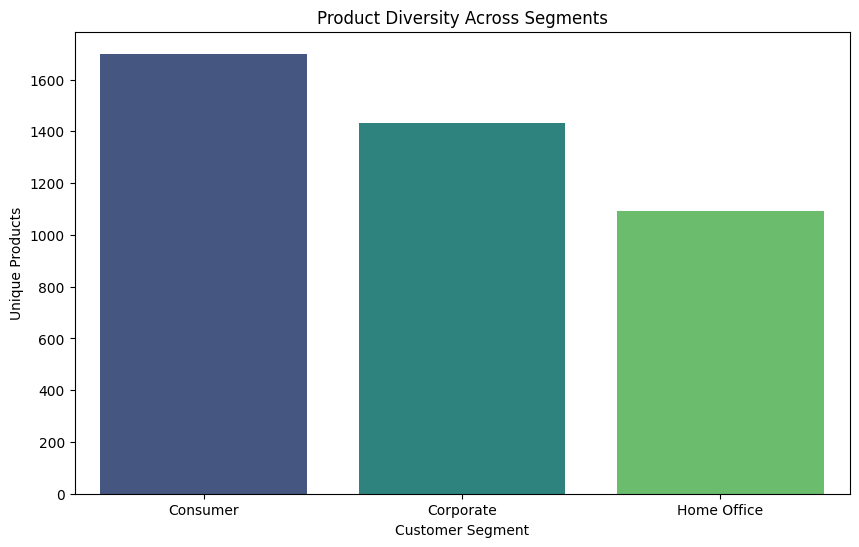

In [50]:
product_diversity = df.groupby('Segment')['Product Name'].nunique().reset_index()
product_diversity.columns = ['Segment', 'Unique Products']
plt.figure(figsize=(10, 6))
sns.barplot(data=product_diversity, x='Segment', y='Unique Products', palette='viridis')
plt.title('Product Diversity Across Segments')
plt.ylabel('Unique Products')
plt.xlabel('Customer Segment')
plt.show()

5.5 Treemaps and Sunburst Charts

In [51]:
category_sales = df.groupby(['Category', 'Sub-Category', 'Product Name'])['Sales'].sum().reset_index()

fig = px.sunburst(category_sales,
                  path=['Category', 'Sub-Category', 'Product Name'],
                  values='Sales',
                  title="Product Hierarchy Performance (Sunburst Chart)")

fig.show()
